## *Est-ce que la passage à la base latine a simplifié les langues turcophones ?* 

## Introduction: 


Après la chute de l'Empire ottoman, Mustafa Kemal Atatürk a initié des réformes radicales pour moderniser la Turquie. En 1928, dans le cadre de la "Révolution des signes" (Harf Devrimi), il a remplacé l'alphabet arabe, utilisé depuis des siècles pour transcrire le turc, par un alphabet dérivé du latin, estimant que ce dernier était mieux adapté à la phonologie turque et faciliterait l'apprentissage de la langue. 


Cette réforme visait également à augmenter le taux d'alphabétisation, qui était alors inférieur à 10%, en simplifiant l'apprentissage de la lecture et de l'écriture. 


D'autres pays turcophones, tels que l'Azerbaïdjan, le Kazakhstan, l'Ouzbékistan et le Turkménistan, ont également adopté l'alphabet latin pour leurs langues respectives, bien que ces langues présentent des différences significatives et que les locuteurs ne se comprennent pas nécessairement entre eux. 


Cela soulève la question suivante : le passage à l'alphabet latin a-t-il réellement simplifié les langues turques ?

Pour explorer cette problématique, nous formulons les hypothèses suivantes :

- H1 : Le passage à l'alphabet latin a réduit le nombre de mots par phrase.
- H2 : Il a diminué le nombre de caractères par mot.
- H3 : Il a réduit le nombre de consonnes par mot.
- H4 : Il a diminué le nombre de voyelles par mot.

## 1. Importation data

In [10]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import mixedlm
from statsmodels.regression.linear_model import OLS



In [11]:

data_path = "phrases_traductions_enrichies.xlsx"  
data = pd.read_excel(data_path)
data

,Langue,Texte_ori,Texte_latin
0,Turc,أحببت أن أصف لكم جمال إسطنبول في الربيع، حيث ت...,İstanbul’un baharında güzellikleri anlatmak is...
1,Turc,في تقريرنا اليوم، نسلط الضوء على التغيرات الكب...,"Bugünkü raporumuzda, Türkiye’nin yeni yüzyılın..."
2,Turc,تعلمون أن النظام التعليمي الجديد الذي بدأ تنفي...,"Bildiğiniz gibi, geçen yıl uygulamaya konulan ..."
3,Turc,كان للكتاب في إسطنبول دور كبير في النهضة الثقا...,"İstanbul’daki kitaplar, 19. yüzyılda Türkiye’d..."
4,Turc,تركيا تتميز بتنوعها الجغرافي حيث تمتزج السواحل...,"Türkiye, dağlık kıyılar ile verimli Anadolu ov..."
...,...,...,...
75,Tatar,المطبخ التتاري يقدم أطباقًا مميزة مثل الشيلبيك...,"Tatar oshxonasi, çelpek va qatay kabi o'ziga x..."
76,Tatar,الثقافة التتارية تتميز بمزيجها بين التأثيرات ا...,Tatar madaniyati rus va islomiy ta'sirlarning ...
77,Tatar,يعد نهر الفولغا رمزًا مهمًا لتاريخ التتار وثقا...,Volga daryosi tatar tarixi va madaniyatining m...
78,Tatar,اللغة التتارية هي إحدى اللغات التركية القديمة.,Tatar tili qadimgi turkiy tillardan biridir.


 La base de données Phoible sera utilisée. Je vais récupérer les données x, y, z qui sont stockées dans les colonnes a, b, c.

## 2. Manipulation

In [12]:

# Fonction pour compter les mots dans une phrase
def count_words(phrase):
    if isinstance(phrase, str):
        return len(phrase.split())
    return 0

# Fonction pour compter les caractères dans une phrase
def count_characters(phrase):
    if isinstance(phrase, str):
        return len(phrase)
    return 0

# Fonction pour compter les caractères uniques
def count_unique_characters(phrase):
    if isinstance(phrase, str):
        return len(set(phrase.replace(" ", "")))  # Supprime les espaces avant de compter
    return 0

# Définir les voyelles et consonnes comme ensembles pour un accès rapide
vowels_turkish = set("aeiouöüâêîôûAEIOUÖÜÂÊÎÔÛıI")
consonants_turkish = set("bcçdfgğhjklmnprsştvyzBCÇDFGĞHJKLMNPRSŞTVYZ")
vowels_arabic = set("اويىإآأًٌٍَُِّْ")
consonants_arabic = set("بتثجحخدذرزسشصضطظعغفقكلمنهء")

# Fonction améliorée pour compter les voyelles
def count_vowels(phrase, vowels):
    if isinstance(phrase, str):
        return sum(1 for char in phrase if char in vowels)
    return 0

# Fonction améliorée pour compter les consonnes
def count_consonants(phrase, consonants):
    if isinstance(phrase, str):
        return sum(1 for char in phrase if char in consonants)
    return 0

# Diagnostiquer le problème
def diagnose_characters(phrase):
    if isinstance(phrase, str):
        return [(char, "Vowel" if char in vowels_arabic else "Consonant" if char in consonants_arabic else "Other")
                for char in phrase]
    return []




In [13]:

# Vérifiez les caractères dans les phrases originales
data['Character_Diagnosis'] = data['Texte_ori'].apply(diagnose_characters)

# Ajouter les colonnes pour les voyelles et consonnes corrigées

data['Character_Diagnosis']

0     [(أ, Vowel), (ح, Consonant), (ب, Consonant), (...
1     [(ف, Consonant), (ي, Vowel), ( , Other), (ت, C...
2     [(ت, Consonant), (ع, Consonant), (ل, Consonant...
3     [(ك, Consonant), (ا, Vowel), (ن, Consonant), (...
4     [(ت, Consonant), (ر, Consonant), (ك, Consonant...
                            ...                        
75    [(ا, Vowel), (ل, Consonant), (م, Consonant), (...
76    [(ا, Vowel), (ل, Consonant), (ث, Consonant), (...
77    [(ي, Vowel), (ع, Consonant), (د, Consonant), (...
78    [(ا, Vowel), (ل, Consonant), (ل, Consonant), (...
79    [(ت, Consonant), (ش, Consonant), (ه, Consonant...
Name: Character_Diagnosis, Length: 80, dtype: object

In [14]:

# Ajouter des colonnes pour le nombre de mots
data['Words_ori'] = data['Texte_ori'].apply(count_words)
data['Words_latin'] = data['Texte_latin'].apply(count_words)

# Calculer la différence entre le nombre de mots
data['Word_difference'] = data['Words_latin'] - data['Words_ori']

# Ajouter des colonnes pour le nombre de caractères
data['Chars_ori'] = data['Texte_ori'].apply(count_characters)
data['Chars_latin'] = data['Texte_latin'].apply(count_characters)

# Calculer la différence entre le nombre de caractères
data['Char_difference'] = data['Chars_latin'] - data['Chars_ori']

# Ajouter des colonnes pour les caractères uniques
data['Unique_chars_ori'] = data['Texte_ori'].apply(count_unique_characters)
data['Unique_chars_latin'] = data['Texte_latin'].apply(count_unique_characters)

# Ajouter des colonnes pour la longueur moyenne des mots
data['Avg_word_length_ori'] = data['Chars_ori'] / data['Words_ori']
data['Avg_word_length_latin'] = data['Chars_latin'] / data['Words_latin']

# Ajouter les colonnes pour les voyelles et consonnes

data['Vowels_latin'] = data['Texte_latin'].apply(count_vowels, vowels=vowels_turkish)
data['Consonants_latin'] = data['Texte_latin'].apply(count_consonants, consonants=consonants_turkish)
data['Vowels_arabic'] = data['Texte_ori'].apply(count_vowels, vowels=vowels_arabic)
data['Consonants_arabic'] = data['Texte_ori'].apply(count_consonants, consonants=consonants_arabic)


# Créer un tableau comparatif avec chaque couple de phrases
data['Comparison'] = data.apply(lambda row: f"Ori: {row['Words_ori']} mots, Latin: {row['Words_latin']} mots, Diff: {row['Word_difference']}; Ori: {row['Chars_ori']} chars, Latin: {row['Chars_latin']} chars, Diff: {row['Char_difference']}; Unique Ori: {row['Unique_chars_ori']}, Unique Latin: {row['Unique_chars_latin']}; Vowels Latin: {row['Vowels_latin']}, Consonants Latin: {row['Consonants_latin']}; Vowels Arabic: {row['Vowels_arabic']}, Consonants Arabic: {row['Consonants_arabic']}", axis=1)


In [29]:

# Résumé des mots
same_count = len(data[data['Word_difference'] == 0])
more_words = len(data[data['Word_difference'] > 0])
less_words = len(data[data['Word_difference'] < 0])

# Résumé des caractères
same_chars = len(data[data['Char_difference'] == 0])
more_chars = len(data[data['Char_difference'] > 0])
less_chars = len(data[data['Char_difference'] < 0])

# Résumé des caractères uniques
same_unique_chars = len(data[data['Unique_chars_ori'] == data['Unique_chars_latin']])
more_unique_chars = len(data[data['Unique_chars_latin'] > data['Unique_chars_ori']])
less_unique_chars = len(data[data['Unique_chars_latin'] < data['Unique_chars_ori']])

# Résumé des voyelles et consonnes (turques)
same_vowels = len(data[data['Vowels_arabic'] == data['Vowels_latin']])
more_vowels = len(data[data['Vowels_latin'] > data['Vowels_arabic']])
less_vowels = len(data[data['Vowels_latin'] < data['Vowels_arabic']])

same_consonants = len(data[data['Consonants_arabic'] == data['Consonants_latin']])
more_consonants = len(data[data['Consonants_latin'] > data['Consonants_arabic']])
less_consonants = len(data[data['Consonants_latin'] < data['Consonants_arabic']])

data

,Langue,Texte_ori,Texte_latin,Character_Diagnosis,Words_ori,Words_latin,Word_difference,Chars_ori,Chars_latin,Char_difference,Unique_chars_ori,Unique_chars_latin,Avg_word_length_ori,Avg_word_length_latin,Vowels_latin,Consonants_latin,Vowels_arabic,Consonants_arabic,Comparison
0,Turc,أحببت أن أصف لكم جمال إسطنبول في الربيع، حيث ت...,İstanbul’un baharında güzellikleri anlatmak is...,"[(أ, Vowel), (ح, Consonant), (ب, Consonant), (...",19,15,-4,110,134,24,30,30,5.789474,8.933333,47,68,27,59,"Ori: 19 mots, Latin: 15 mots, Diff: -4; Ori: 1..."
1,Turc,في تقريرنا اليوم، نسلط الضوء على التغيرات الكب...,"Bugünkü raporumuzda, Türkiye’nin yeni yüzyılın...","[(ف, Consonant), (ي, Vowel), ( , Other), (ت, C...",16,11,-5,92,102,10,26,25,5.750000,9.272727,39,50,24,49,"Ori: 16 mots, Latin: 11 mots, Diff: -5; Ori: 9..."
2,Turc,تعلمون أن النظام التعليمي الجديد الذي بدأ تنفي...,"Bildiğiniz gibi, geçen yıl uygulamaya konulan ...","[(ت, Consonant), (ع, Consonant), (ل, Consonant...",18,14,-4,111,122,11,27,26,6.166667,8.714286,45,61,32,59,"Ori: 18 mots, Latin: 14 mots, Diff: -4; Ori: 1..."
3,Turc,كان للكتاب في إسطنبول دور كبير في النهضة الثقا...,"İstanbul’daki kitaplar, 19. yüzyılda Türkiye’d...","[(ك, Consonant), (ا, Vowel), (ن, Consonant), (...",16,10,-6,88,87,-1,22,27,5.500000,8.700000,28,42,21,49,"Ori: 16 mots, Latin: 10 mots, Diff: -6; Ori: 8..."
4,Turc,تركيا تتميز بتنوعها الجغرافي حيث تمتزج السواحل...,"Türkiye, dağlık kıyılar ile verimli Anadolu ov...","[(ت, Consonant), (ر, Consonant), (ك, Consonant...",12,11,-1,79,95,16,25,29,6.583333,8.636364,37,46,20,45,"Ori: 12 mots, Latin: 11 mots, Diff: -1; Ori: 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Tatar,المطبخ التتاري يقدم أطباقًا مميزة مثل الشيلبيك...,"Tatar oshxonasi, çelpek va qatay kabi o'ziga x...","[(ا, Vowel), (ل, Consonant), (م, Consonant), (...",8,11,3,56,73,17,21,27,7.000000,6.636364,26,30,16,30,"Ori: 8 mots, Latin: 11 mots, Diff: 3; Ori: 56 ..."
76,Tatar,الثقافة التتارية تتميز بمزيجها بين التأثيرات ا...,Tatar madaniyati rus va islomiy ta'sirlarning ...,"[(ا, Vowel), (ل, Consonant), (ث, Consonant), (...",8,10,2,64,79,15,20,20,8.000000,7.900000,29,39,21,31,"Ori: 8 mots, Latin: 10 mots, Diff: 2; Ori: 64 ..."
77,Tatar,يعد نهر الفولغا رمزًا مهمًا لتاريخ التتار وثقا...,Volga daryosi tatar tarixi va madaniyatining m...,"[(ي, Vowel), (ع, Consonant), (د, Consonant), (...",8,8,0,51,60,9,19,19,6.375000,7.500000,22,29,14,29,"Ori: 8 mots, Latin: 8 mots, Diff: 0; Ori: 51 c..."
78,Tatar,اللغة التتارية هي إحدى اللغات التركية القديمة.,Tatar tili qadimgi turkiy tillardan biridir.,"[(ا, Vowel), (ل, Consonant), (ل, Consonant), (...",7,6,-1,46,44,-2,16,16,6.571429,7.333333,15,22,13,22,"Ori: 7 mots, Latin: 6 mots, Diff: -1; Ori: 46 ..."


## 3. Descrpition

In [16]:

print("\nRésumé des différences de mots par phrase :")
print(f"Même nombre de mots : {same_count}")
print(f"Plus de mots en base latine : {more_words}")
print(f"Moins de mots en base latine : {less_words}")

print("\nRésumé des différences de caractères par phrase :")
print(f"Même nombre de caractères : {same_chars}")
print(f"Plus de caractères en base latine : {more_chars}")
print(f"Moins de caractères en base latine : {less_chars}")

print("\nRésumé des différences de caractères uniques par phrase :")
print(f"Même nombre de caractères uniques : {same_unique_chars}")
print(f"Plus de caractères uniques en base latine : {more_unique_chars}")
print(f"Moins de caractères uniques en base latine : {less_unique_chars}")

print("\nRésumé des voyelles (turques) :")
print(f"Même nombre de voyelles : {same_vowels}")
print(f"Plus de voyelles en base latine : {more_vowels}")
print(f"Moins de voyelles en base latine : {less_vowels}")

print("\nRésumé des consonnes (turques) :")
print(f"Même nombre de consonnes : {same_consonants}")
print(f"Plus de consonnes en base latine : {more_consonants}")
print(f"Moins de consonnes en base latine : {less_consonants}")



Résumé des différences de mots par phrase :
Même nombre de mots : 11
Plus de mots en base latine : 20
Moins de mots en base latine : 49

Résumé des différences de caractères par phrase :
Même nombre de caractères : 2
Plus de caractères en base latine : 67
Moins de caractères en base latine : 11

Résumé des différences de caractères uniques par phrase :
Même nombre de caractères uniques : 11
Plus de caractères uniques en base latine : 52
Moins de caractères uniques en base latine : 17

Résumé des voyelles (turques) :
Même nombre de voyelles : 4
Plus de voyelles en base latine : 75
Moins de voyelles en base latine : 1

Résumé des consonnes (turques) :
Même nombre de consonnes : 8
Plus de consonnes en base latine : 55
Moins de consonnes en base latine : 17


In [17]:




# Vérifier les valeurs manquantes et les gérer
data = data.dropna(subset=['Langue', 'Words_ori', 'Chars_ori', 'Vowels_arabic', 'Consonants_arabic', 'Words_latin'])

# 1. Analyse descriptive
print("\n--- Analyse descriptive ---")
print(data[['Words_ori', 'Words_latin', 'Chars_ori', 'Chars_latin', 'Vowels_arabic', 'Vowels_latin', 'Consonants_arabic', 'Consonants_latin']].describe())



--- Analyse descriptive ---
       Words_ori  Words_latin   Chars_ori  Chars_latin  Vowels_arabic  \
count  80.000000    80.000000   80.000000    80.000000       80.00000   
mean   11.175000    10.087500   69.225000    82.150000       16.00000   
std     4.074543     2.864862   19.513043    22.342048        5.30345   
min     6.000000     5.000000   43.000000    44.000000        7.00000   
25%     8.000000     8.000000   54.500000    65.750000       12.00000   
50%    11.000000    10.000000   66.500000    78.000000       15.00000   
75%    13.000000    12.000000   79.000000    95.000000       18.25000   
max    27.000000    20.000000  150.000000   143.000000       32.00000   

       Vowels_latin  Consonants_arabic  Consonants_latin  
count      80.00000          80.000000         80.000000  
mean       27.86250          36.175000         39.325000  
std         8.34652           9.712024         11.292178  
min        14.00000          22.000000         21.000000  
25%        22.0000

#### *Graphiques monovariés*

/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

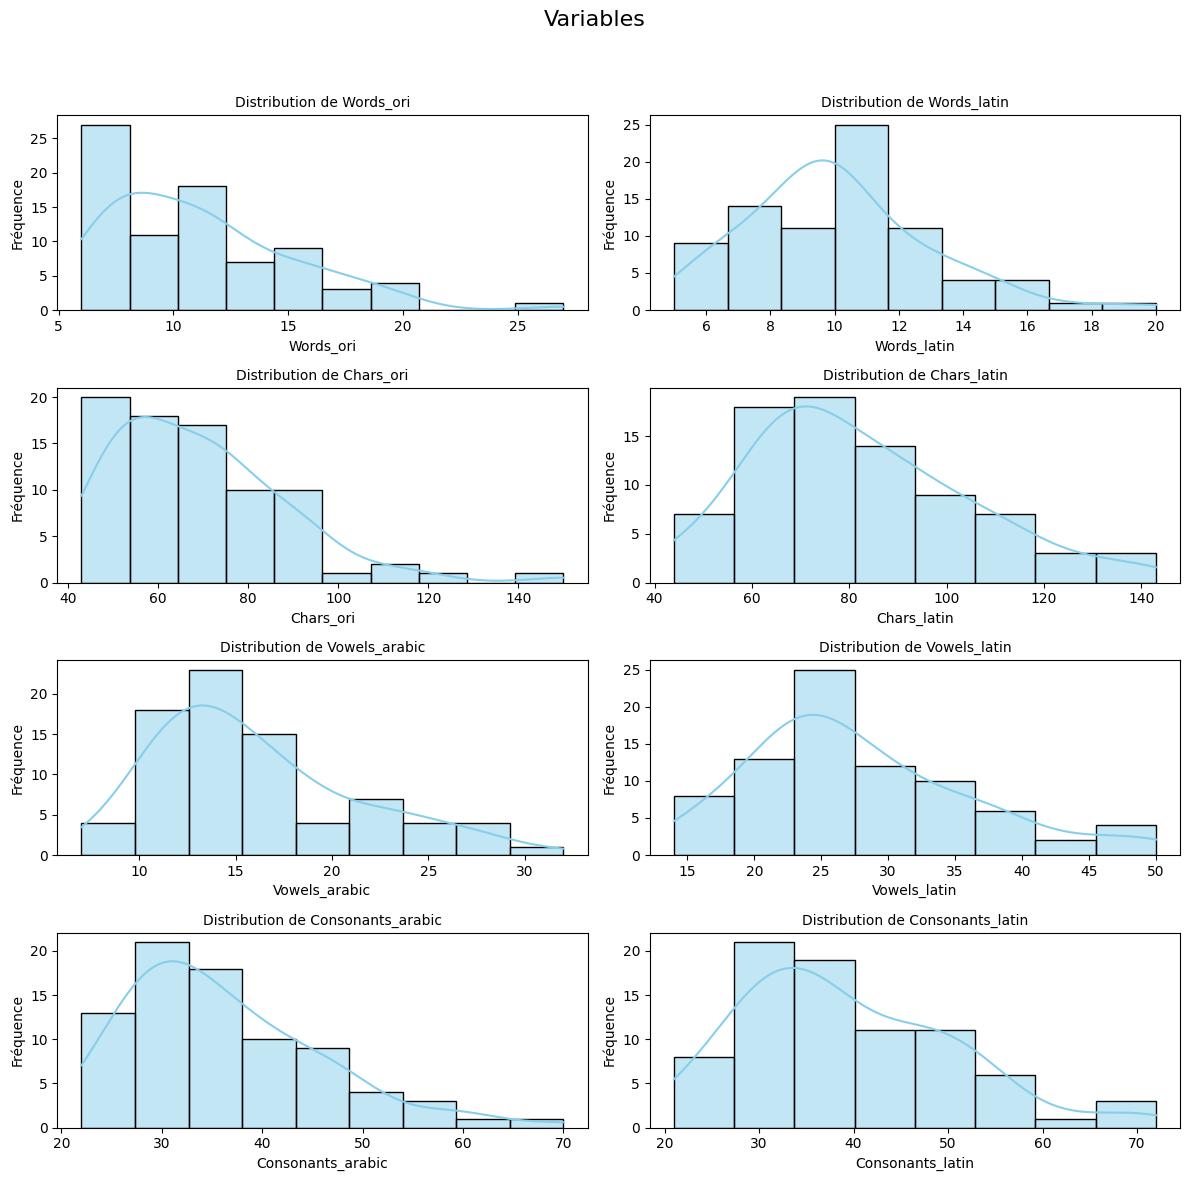

In [18]:


# --------------------------------------------------
# 1) Panel Monovarié (Histogrammes)
# --------------------------------------------------
monovariate_cols = [
    'Words_ori', 'Words_latin', 'Chars_ori', 'Chars_latin',
    'Vowels_arabic', 'Vowels_latin', 'Consonants_arabic', 'Consonants_latin'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
axes = axes.flatten()  # Pour parcourir aisément les axes

for i, col in enumerate(monovariate_cols):
    # Histogramme + courbe KDE
    sns.histplot(data=data, x=col, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution de {col}", fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")

# Titre général pour ce panel
fig.suptitle("Variables", fontsize=16)

# Ajuster la mise en page pour laisser de la place au titre global
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()





# 3. Validation des Hypothèses

*H1*

In [47]:

df= data

# Calculer la différence de mots
word_diff = data['Words_latin'] - data['Words_ori']

# Test de Shapiro-Wilk pour vérifier la normalité
stat, p = shapiro(word_diff)
print(f"Shapiro-Wilk Test pour Word_difference: p-value = {p}")

if p > 0.05:
    stat, p_value = ttest_rel(df['Words_ori'], df['Words_latin'])
    print(f"Test t apparié: p-value = {p_value}")
else:
    stat, p_value = wilcoxon(df['Words_ori'], df['Words_latin'])
    print(f"Test Wilcoxon signé: p-value = {p_value}")



Shapiro-Wilk Test pour Word_difference: p-value = 0.023563463240861893
Test Wilcoxon signé: p-value = 0.0002479838355340489


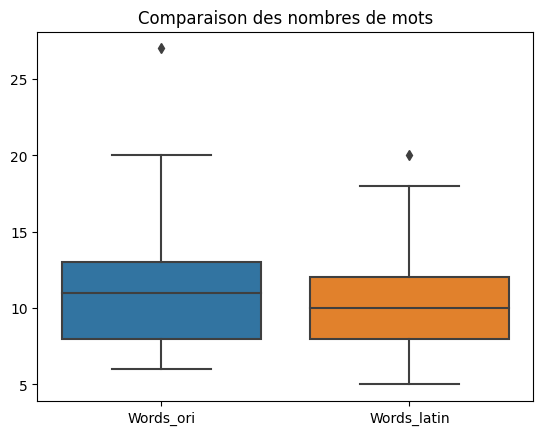

In [20]:
# Boxplot pour comparaison
sns.boxplot(data=data[['Words_ori', 'Words_latin']])
plt.title('Comparaison des nombres de mots')
plt.show()


L'hypothèse nulle (H0) selon laquelle il n'y a pas de différence significative entre les moyennes est rejetée.
Cependant, comme la statistique t est positive, cela indique que le nombre moyen de mots par phrase a augmenté après le passage à l'alphabet latin.
H1 est donc infirmée.

*H2*

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro
import matplotlib.pyplot as plt
# Test de normalité pour la longueur moyenne des mots
stat_ori, p_ori = shapiro(data['Avg_word_length_ori'])
stat_latin, p_latin = shapiro(data['Avg_word_length_latin'])

print(f"Shapiro-Wilk Test pour Avg_word_length_ori: p-value = {p_ori}")
print(f"Shapiro-Wilk Test pour Avg_word_length_latin: p-value = {p_latin}")


Shapiro-Wilk Test pour Avg_word_length_ori: p-value = 0.01572212018072605
Shapiro-Wilk Test pour Avg_word_length_latin: p-value = 0.21030424535274506


In [35]:
from scipy.stats import wilcoxon

# Appliquer le test Wilcoxon signé
stat, p_value = wilcoxon(data['Avg_word_length_ori'], data['Avg_word_length_latin'])
print(f"Test Wilcoxon signé pour Avg_word_length: p-value = {p_value}")


Test Wilcoxon signé pour Avg_word_length: p-value = 3.4391930227338456e-13


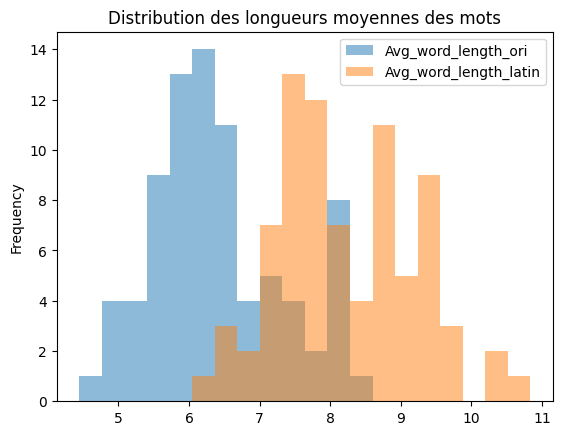

In [22]:
# Histogramme
data[['Avg_word_length_ori', 'Avg_word_length_latin']].plot(kind='hist', alpha=0.5, bins=20)
plt.title('Distribution des longueurs moyennes des mots')
plt.show()


Vous pouvez rejeter l'hypothèse nulle (H0) selon laquelle le passage à l'alphabet latin n'a pas eu d'effet sur le nombre de caractères par mot.
Le résultat soutient fortement 
H2: le passage à l'alphabet latin a réduit le nombre de caractères par mot.

*H3*

In [38]:
data['Consonants_per_word_arabic'] = data['Consonants_arabic'] / data['Words_ori']
data['Consonants_per_word_latin'] = data['Consonants_latin'] / data['Words_latin']


In [40]:
# Test de normalité pour les ratios de consonnes
stat, p = shapiro(data['Consonants_per_word_arabic'] - data['Consonants_per_word_latin'])
print(f"Shapiro-Wilk Test pour la différence des ratios de consonnes: p-value = {p}")


Shapiro-Wilk Test pour la différence des ratios de consonnes: p-value = 0.019072532653808594


In [41]:
stat, p_value = ttest_rel(data['Consonants_per_word_arabic'], data['Consonants_per_word_latin'])
print(f"Test t apparié pour les ratios de consonnes: p-value = {p_value}")


Test t apparié pour les ratios de consonnes: p-value = 1.8857168105198913e-08


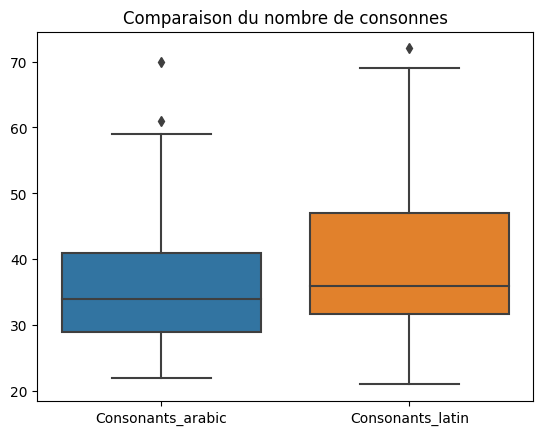

In [24]:
# Distribution des consonnes
sns.boxplot(data=data[['Consonants_arabic', 'Consonants_latin']])
plt.title('Comparaison du nombre de consonnes')
plt.show()


Vous pouvez rejeter l’hypothèse nulle (H0), qui postule qu’il n’y a pas de différence significative dans le nombre de consonnes par mot avant et après le passage à l’alphabet latin.
Le résultat soutient 
H3: le passage à l’alphabet latin a réduit le nombre de consonnes par mot.

*H4*

In [42]:
data['Vowels_per_word_arabic'] = data['Vowels_arabic'] / data['Words_ori']
data['Vowels_per_word_latin'] = data['Vowels_latin'] / data['Words_latin']


In [43]:
# Test de normalité pour les ratios de voyelles
stat, p = shapiro(data['Vowels_per_word_arabic'] - data['Vowels_per_word_latin'])
print(f"Shapiro-Wilk Test pour la différence des ratios de voyelles: p-value = {p}")


Shapiro-Wilk Test pour la différence des ratios de voyelles: p-value = 0.4654826819896698


In [44]:
stat, p_value = wilcoxon(data['Vowels_per_word_arabic'], data['Vowels_per_word_latin'])
print(f"Test Wilcoxon signé pour les ratios de voyelles: p-value = {p_value}")



Test Wilcoxon signé pour les ratios de voyelles: p-value = 5.4511925707927594e-14


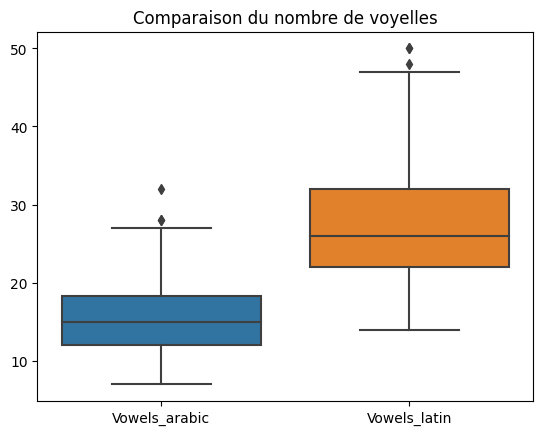

In [45]:
# Distribution des voyelles
sns.boxplot(data=data[['Vowels_arabic', 'Vowels_latin']])
plt.title('Comparaison du nombre de voyelles')
plt.show()


Vous pouvez rejeter l’hypothèse nulle (H0), qui postule qu’il n’y a pas de différence significative dans le nombre de voyelles par mot avant et après le passage à l’alphabet latin.
Le résultat soutient 
H4: le passage à l’alphabet latin a réduit le nombre de voyelles par mot.

### *Test global*

In [27]:
# Variables explicatives et cible
X = data[['Char_difference', 'Word_difference', 'Consonants_arabic', 'Vowels_arabic']]
y = data['Words_latin']

# Ajouter une constante
X = sm.add_constant(X)

# Régression
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            Words_latin   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     83.80
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           6.72e-27
Time:                        12:55:09   Log-Likelihood:                -129.25
No. Observations:                  80   AIC:                             268.5
Df Residuals:                      75   BIC:                             280.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5713      0.63

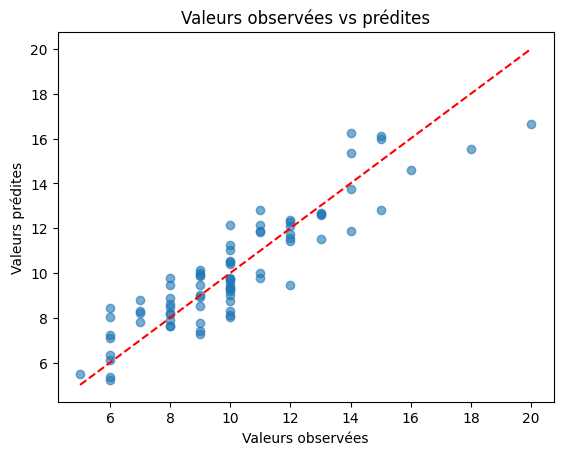

In [28]:
# Valeurs observées vs prédites
predicted = model.predict(X)
observed = y

plt.scatter(observed, predicted, alpha=0.6)
plt.plot([observed.min(), observed.max()], [observed.min(), observed.max()], color='red', linestyle='--')
plt.title("Valeurs observées vs prédites")
plt.xlabel("Valeurs observées")
plt.ylabel("Valeurs prédites")
plt.show()



Variables significatives :
Char_difference
Char_difference, 
Word_difference
Word_difference, et 
Consonants_arabic
Consonants_arabic sont significatives (
p
<
0.05
p<0.05).
Ces trois variables influencent positivement 
Words_latin
Words_latin, indiquant qu'un nombre plus élevé de différences de caractères, de mots et de consonnes en arabe est associé à un plus grand nombre de mots en base latine.
Variable non significative :
Vowels_arabic
Vowels_arabic n'a pas d'effet significatif sur le nombre de mots en base latine (
p
>
0.05
p>0.05).

## 4. Conclusion: 


Finalement, 

N.B: Pour le code je me suis entre autre aidée de Chat GPT et des TD.